# Instructions
You are the growth analyst for a chain of department stores that ran 3 promotions recently. The Marketing team wants to know which promotion was the most effective in generating sales. You job is to inform the marketing team on the impact of the test.

## Deliverable
A short presentation of your analysis of this A/B test outlining which strategy was more effective and what recommendations you will make to the Marketing Department on what or any changes they should make for the next promotion.

### Descriptions of variables:
MarketID
    - Unique identifier for market
MarketSize
    - Size of market area by sales
LocationID
    - Unique identifier for store location
AgeOfStore
    - Age of store in years
Promotion
    - One of three promotions that was tested
Week
    - One of four weeks when the promotions were run
SalesInThousands
    - Sales amount for specific LocationID, Promotion, and week

In [44]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/pthiagu2/DataMining/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")

In [83]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [47]:
# What are the market size in our data
df['MarketSize'].value_counts()

Medium    320
Large     168
Small      60
Name: MarketSize, dtype: int64

In [48]:
# Data Exploration
#Use summary statistics to spot problems & errors
df.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.0+ KB


In [49]:
df.isnull().values.any() # no missing values

False

In [84]:
df.duplicated().value_counts() #no duplication of data

False    548
dtype: int64

In [50]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [51]:
#Check for skew and outliers (histogram)

In [52]:
df.groupby('Promotion')['MarketID'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,5.790698,2.993624,1.0,3.0,6.0,8.0,10.0
2,188.0,5.893617,2.897419,1.0,4.0,6.0,9.0,10.0
3,188.0,5.468085,2.742816,1.0,3.0,6.0,8.0,10.0


In [53]:
marketID_by_promotion = df.groupby(['Promotion','MarketID'])['SalesInThousands'].count() # count() return a dataframe & NOT count missing values
marketID_by_promotion

Promotion  MarketID
1          1           20
           2            4
           3           28
           4           16
           5            8
           6           20
           7           16
           8           20
           9           12
           10          28
2          1           20
           3           24
           4           16
           5           32
           6           24
           7           16
           8            8
           9            8
           10          40
3          1           12
           2           20
           3           36
           4            4
           5           20
           6           16
           7           28
           8           20
           9           20
           10          12
Name: SalesInThousands, dtype: int64

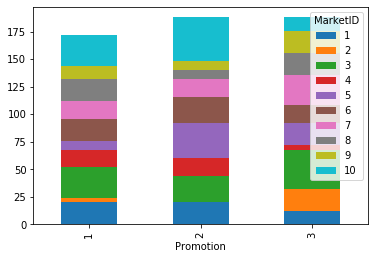

In [54]:
#Visually check distributions for single variables
axis = marketID_by_promotion.unstack().plot(kind="bar", stacked=True) 

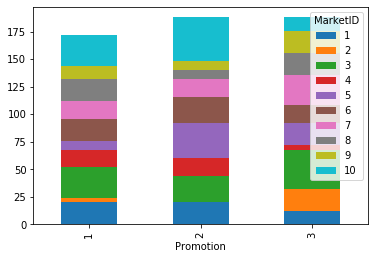

In [55]:
# Alternatives
df.groupby(['Promotion','MarketID']).size().unstack().plot(kind='bar',stacked=True) # size() return a series
plt.show()

# Findings
In the above graph, we can see MarketID = 2 is missing in promotion 2;
[Action] We need to investigate the reasons beyond
Should we exclude promotion 2 in our analysis? (Purpose: to make sure we have fair analysis next time)

In [56]:
week_by_promotion = df.groupby(['Promotion','week'])['SalesInThousands'].count() # count() return a dataframe & NOT count missing values
week_by_promotion

Promotion  week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: SalesInThousands, dtype: int64

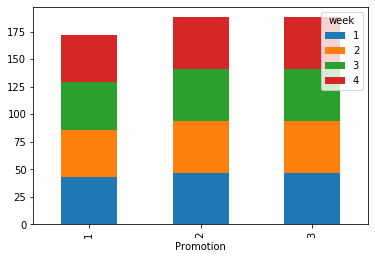

In [57]:
# Visually check distributions for single variables
df.groupby(['Promotion','week']).size().unstack().plot(kind='bar',stacked=True)

In [58]:
df.groupby('Promotion')['week'].describe() # Normally distributed

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,2.5,1.121298,1.0,1.75,2.5,3.25,4.0
2,188.0,2.5,1.121019,1.0,1.75,2.5,3.25,4.0
3,188.0,2.5,1.121019,1.0,1.75,2.5,3.25,4.0


In [87]:
df.groupby('Promotion')['AgeOfStore'].describe() # Normally distributed

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


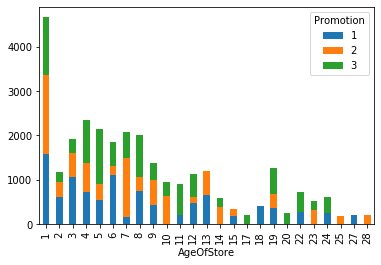

In [85]:
store_age_by_promotion = df.groupby(['AgeOfStore','Promotion'])['SalesInThousands'].sum()
#store_age_by_promotion
store_age_by_promotion.unstack().plot(kind="bar", stacked=True) 
# It seemed that the stores generate higher sales with promotion for younger age of store. (Futher test is possible, but it is out of our current scope)

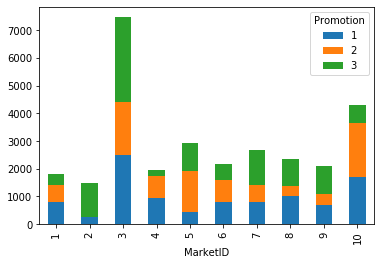

In [86]:
marketID_by_promotion = df.groupby(['MarketID','Promotion'])['SalesInThousands'].sum()
marketID_by_promotion
marketID_by_promotion.unstack().plot(kind="bar", stacked=True) 
#It seemed that Market 3 generates higher sales with promotion compared to the rest of markets. (Futher test is possible, but it is out of our current scope)

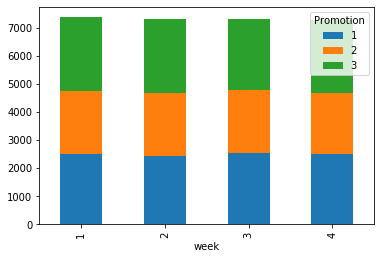

In [61]:
week_by_promotion = df.groupby(['week','Promotion'])['SalesInThousands'].sum()
week_by_promotion.unstack().plot(kind="bar", stacked=True)
# It seemed that it doesn't matter when the promotion starts

In [89]:
df.groupby('Promotion')['SalesInThousands'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,58.099012,16.553782,30.81,46.3525,55.385,63.6175,99.65
2,188.0,47.329415,15.108955,17.34,38.1700,45.385,51.7450,88.64
3,188.0,55.364468,16.766231,22.18,44.1975,51.165,61.7325,96.48


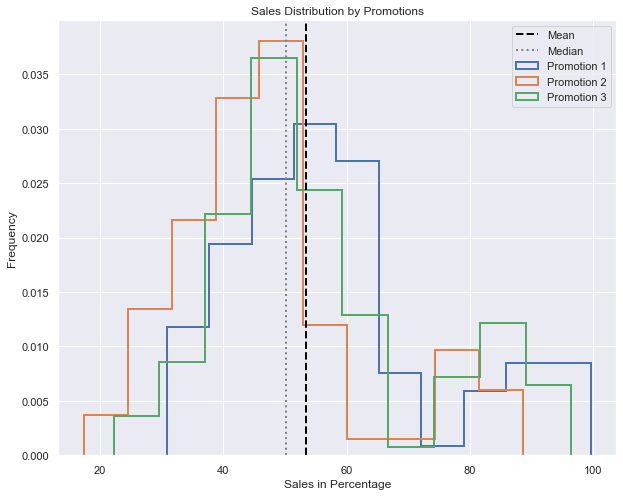

In [149]:
#%matplotlib inline
data_1 = df[df['Promotion']==1]['SalesInThousands']
data_2 = df[df['Promotion']==2]['SalesInThousands']
data_3 = df[df['Promotion']==3]['SalesInThousands']
total_sales_average = df['SalesInThousands'].mean()
total_sales_median = df['SalesInThousands'].median()

plt.figure(figsize=(10,8))
plt.axvline(total_sales_average, color='black', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(total_sales_median, color='grey', linestyle='dotted', linewidth=2, label="Median")
plt.hist(data_1, bins = 10,histtype = 'step', linewidth = 2, density=True) # 'step' - to make these histograms more visible.
plt.hist(data_2, bins = 10, histtype = 'step',linewidth = 2, density=True)
plt.hist(data_3, bins = 10, histtype = 'step',linewidth = 2, density=True)
plt.legend(['Mean','Median','Promotion 1', 'Promotion 2', 'Promotion 3'])
plt.title('Sales Distribution by Promotions', fontsize = 12)
plt.xlabel('Sales in Percentage')
plt.ylabel('Frequency')
#plt.savefig('my_histogram.png')
plt.show()
#Normally distributed among different groups

In [62]:
df['Promotion'] = df['Promotion'].astype('category')
df['MarketID'] = df['MarketID'].astype('category')
df.dtypes

MarketID            category
MarketSize            object
LocationID             int64
AgeOfStore             int64
Promotion           category
week                   int64
SalesInThousands     float64
dtype: object

In [63]:
#Examine sales data grouped by promo and week
promotion_summary = df.groupby(['Promotion','week']).agg({'SalesInThousands':['min','median','mean','std','max','sum']})
promotion_summary

SalesInThousands                                             
                            min median       mean        std    max      sum
Promotion week                                                              
1         1               35.30  53.79  58.244419  16.798929  99.65  2504.51
          2               35.86  55.11  56.929535  16.553088  96.01  2447.97
          3               32.05  56.19  58.774884  16.423121  99.12  2527.32
          4               30.81  56.84  58.447209  16.962984  97.61  2513.23
2         1               27.81  46.02  47.730213  14.387406  88.64  2243.32
          2               17.34  45.75  47.582553  14.854098  82.86  2236.38
          3               23.93  45.35  47.722128  15.979831  88.12  2242.94
          4               19.26  44.84  46.282766  15.604704  80.75  2175.29
3         1               24.75  51.01  55.776170  18.071909  96.48  2621.48
          2               22.18  53.47  55.949149  15.643490  90.30  2629.61
          3               29.03  50.55  54.377872  17.219269  93.63  2555.76
          4               26.68  50.05  55.354681  16.535599  94.21  2601.67

#Reference: https://www.pythonfordatascience.org/anova-python/
# Parametric test assumption
- Population distributions are normal
- Samples have equal variances
- Independence
The test statistic is the F-statistic and compares the mean square between samples to the mean square within sample 

The reason why it's called an one-way or one factor ANOVA even though there are 3 or more groups being tested is because those groups are under one categorical variable, such as race or education level, and the name is referring to the number of variables in the analysis and not the number of groups. If there are two variables being compared it would technically be called a two-way, or two factor, ANOVA if both variables are categorical, or it could be called an ANCOVA if the 2nd variable is continuous. The "C" doesn't stand for continuous, it stands for covariate.

When working from the ANOVA framework, independent variables are sometimes referred to as factors and the number of groups within each variable are called levels, i.e. one variable with 3 categories could be referred to as a factor with 3 levels.


In [64]:
import researchpy as rp
rp.summary_cont(df['SalesInThousands'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,SalesInThousands,548.0,53.466204,16.755216,0.715747,52.060254,54.872154


In [65]:
rp.summary_cont(df['SalesInThousands'].groupby(df['Promotion']))

,N,Mean,SD,SE,95% Conf.,Interval
Promotion,,,,,,
1,172,58.099012,16.553782,1.262214,55.617849,60.580174
2,188,47.329415,15.108955,1.101934,45.163858,49.494972
3,188,55.364468,16.766231,1.222803,52.961374,57.767562


In [91]:
from scipy.stats import ttest_ind
import scipy.stats as stats

from scipy.stats import f_oneway
import numpy as np


#f_statistic, pval = 
f_stats, pval = f_oneway(df['SalesInThousands'][df.Promotion == 1],
                   df['SalesInThousands'][df.Promotion == 2],
                   df['SalesInThousands'][df.Promotion == 3]
                  )

In [67]:
#Is the p-value significant?
pval <0.05

True

# Interpretation
Promotions were run to increase sales. The purpose of this study was to test for a difference between different promotions. The overall average was 53.5 thousands 95% CI(52.1,54.9) with group average of 58.1 95% CI(55.6,60.6) for Promotion 1; 47.3 95% CI(45.2, 49.5) for Promotion 2;55.4 95% CI(53.0, 57.8). There is a statistically significant difference between the promotions and their effects on sales, F= 21.95, p-value= 6.77e-10.

# Post-hoc tests
In order to tell which groups differed significantly, post-hoc tests need to be conducted.

Assumptions for the test
-Observations are independent within and among groups.
-The groups for each mean in the test are normally distributed.
-All groups have equal variances (Homogeneity of variance)

In [69]:
stats.levene(df['SalesInThousands'][df.Promotion == 1],
             df['SalesInThousands'][df.Promotion == 2],
             df['SalesInThousands'][df.Promotion == 3]
            )

LeveneResult(statistic=1.2696787527507418, pvalue=0.2817514565692118)

The Levene's test of homogeneity of variances is not significant which indicates that the groups have non-statistically significant difference in their varability. Again, it may be worthwhile to check this assumption visually as well.

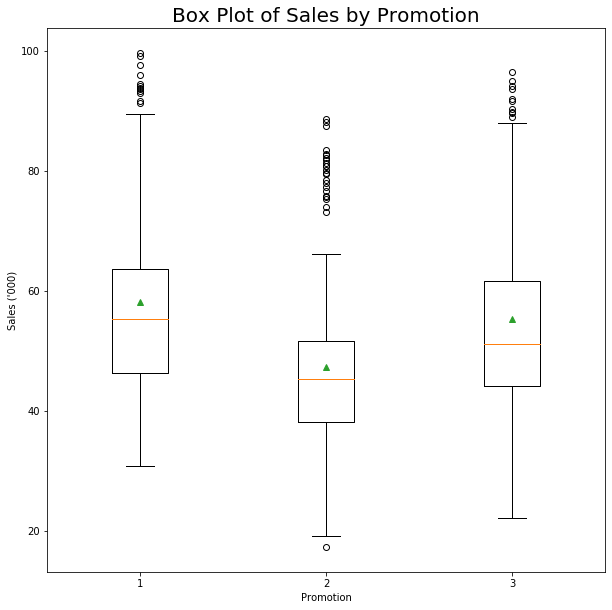

In [70]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Sales by Promotion", fontsize= 20)
ax.set

data = [df['SalesInThousands'][df.Promotion == 1],
        df['SalesInThousands'][df.Promotion == 2],
        df['SalesInThousands'][df.Promotion == 3]]

ax.boxplot(data,
           labels= ['1', '2', '3'],
           showmeans= True)

plt.xlabel("Promotion")
plt.ylabel("Sales ('000)")

plt.show()

The three boxplots show that there is very little difference in spread between Promotion 1 & 3 while there is great difference of whisker between Promotion 2 and Promotion (1&3). The median and interquartile range are almost identical among them.

All promotions had many outliers that were fairly spread out
* Where do the outliers come from? Are they from different markets --> further test can be conducted, but it's out of our current scope

In [78]:
import statsmodels.stats.multicomp as mc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

comp = mc.MultiComparison(df['SalesInThousands'], df['Promotion'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.001,-14.774,-6.7652,True
1,3,-2.7345,0.2447,-6.7389,1.2698,False
2,3,8.0351,0.001,4.1207,11.9494,True


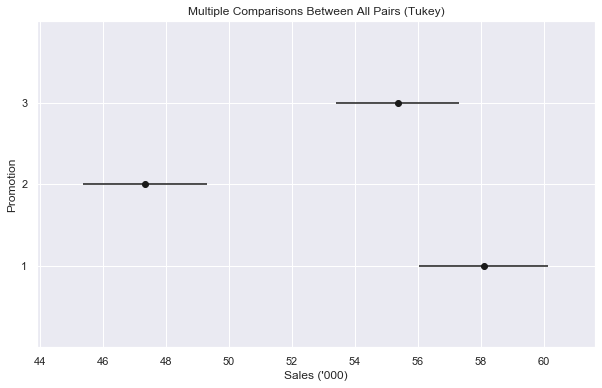

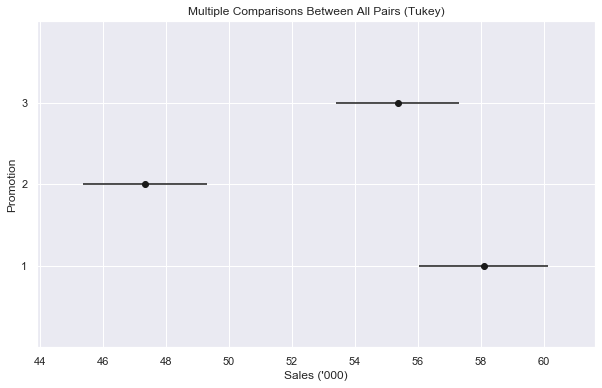

In [150]:
post_hoc_res.plot_simultaneous(ylabel= "Promotion", xlabel= "Sales ('000)")

# Interpretation
Using Tukey HSD to test for differences between Promotions indicates that there is a statistically significant difference in Sales('000) between Promotion 1 and Promotion 2 as well as between Promotion 2 and Promotion 3 while there is no significant difference between Promotion 1 and Promotion 3. What this indicates is that the Promotion 1 and Promotion 3 are effective at increasing sales, but Promotion 2 is not.

In [82]:
#Alternatives to pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(df['SalesInThousands'], df['Promotion'], 0.05)
print(tukey_results)
# p-values need to be adjusted for multiple testing due to more than 2 promotions

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2 -10.7696  0.001 -14.774 -6.7652   True
     1      3  -2.7345 0.2447 -6.7389  1.2698  False
     2      3   8.0351  0.001  4.1207 11.9494   True
----------------------------------------------------


# Conclusion
Promotion 2 should NOT be run.

# What else can we do now?
1. We can run another test with promotion 1 & promotion 3 only to see if we can get statistically significant result.
2. Since we don't have enough statistical evidence to say either Promotion 1 or 3 is better, we can accept that both offer equally well and compare each promotion to without promotion (Control Test) during the time the offer run. If the promotion generates average sales higher than without promotion (using the hypothesis testing mentioned above), we can choose to run either or both promotions.

It appeared in group 1 there were some stores that had slight differences than those stores
in the other groups e.g. some were slightly
younger
it may not have made a difference but we should try to control for this.

# Miscelleneous
Budgets are tight. The cost to roll out a full promotion can wipe out an entire marketing budget if it proves to be a fiasco. This is why many businesses do a test before doing a complete rollout. The testing helps to reduce the amount of uncertainty involved in an all-out campaign and help business make an informed-decision.